# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

# Reading the dataset

In [3]:
df = pd.read_csv("third attempt.csv")

# Let's see how many customers are inactive(0) & active(1) 

In [4]:
df['Activity index'].value_counts(dropna = False)

2    5820
1    4179
Name: Activity index, dtype: int64

# Splitting columns for training and testing purposes

In [5]:
numeric_cols = ['Age', 'Sex']
cat_cols = list(set(df.columns) - set(numeric_cols) - {'Activity index'})
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['Age', 'Sex']
['Customer relation', 'Customer seniority', 'Customer type', 'ID', 'Income', 'New customer index', 'Primary customer']


# Perparement of training dataset

In [6]:
testing_dataset_train = pd.get_dummies(df, columns = ['Primary customer', 'Customer relation', 'Activity index'], drop_first = True)

# Initiating 30% of original data for testing, and the remaining 70% for training

In [7]:
random_seed = 4000
df_train, df_test = train_test_split(df, test_size = 0.30, random_state = random_seed, stratify = df['Activity index']) 

# train dataset accuracy

In [8]:
print(df_train.shape)
print()
print(df_train['Activity index'].value_counts(normalize = True))

(6999, 10)

2    0.582083
1    0.417917
Name: Activity index, dtype: float64


# test dataset accuracy

In [9]:
print(df_test.shape)
print()
print(df_test['Activity index'].value_counts(normalize = True))

(3000, 10)

2    0.582
1    0.418
Name: Activity index, dtype: float64


# Making the logistic regression model...

In [10]:
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['Activity index']
    return X, y 

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

In [11]:
clf = LogisticRegression(penalty = 'none')
clf.fit(X, y)

LogisticRegression(penalty='none')

In [12]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

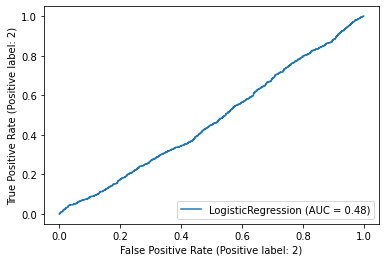

In [13]:
plot_roc_curve(clf, X_test, y_test)

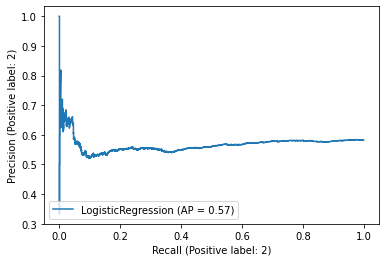

In [14]:
plot_precision_recall_curve(clf, X_test, y_test)

In [15]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [16]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold: ')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 Score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report ')
print(classification_report(y_test, test_pred))

Log loss = 0.67971
AUC = 0.47524
Average Precision = 0.43526

Using 0.5 as threshold: 
Accuracy = 0.58200
Precision = 0.00000
Recall = 0.00000
F1 Score = 0.00000

Classification Report 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1254
           2       0.58      1.00      0.74      1746

    accuracy                           0.58      3000
   macro avg       0.29      0.50      0.37      3000
weighted avg       0.34      0.58      0.43      3000



C:\Users\adana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Confusion Matrix


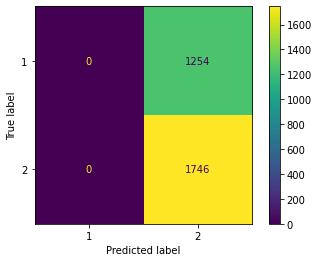

In [17]:
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

In [18]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data = {'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,2.964441e-13
1,Customer relation,1.149161e-10
2,Customer seniority,-9.328713e-12
3,Customer type,1.556083e-12
4,ID,2.569801e-07
5,Income,1.073580e-07
6,New customer index,7.100601e-13
7,Primary customer,3.786791e-11
8,Age,-5.111647e-11
9,Sex,-5.737819e-12


In [19]:
xx = pd.DataFrame(data = {'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})
xx.to_csv('table01.csv')